# Data Preparation and Plot Generation

This notebook orchestrates the full preprocessing pipeline used by the VSGS web server. It:

- Loads the raw VSG expression data exported from the processing script.
- Cleans and enriches the dataset with annotations that the application displays.
- Generates interactive Plotly scatter plots that are embedded directly in the VSGS interface.

Run the notebook from top to bottom to reproduce the datasets and visualizations that power the site.

In [6]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
#process myRna-seq output and prepare table for web visualization

In [7]:
!python vsg_analysis_pipeline.py \
--output vsgs_web_server/data \
--experiment-table experiment_table.txt \
--vsg-dict vsg_dic.txt \
--base-path ../myRna-seq/results/result_vsgs 


╔════════════════════════════════════════════════════════╗
║          🧬 VSG META-ANALYSIS PIPELINE 🧬              ║
║                                                        ║
║  Analyzing Variant Surface Glycoprotein Expression    ║
║           in Trypanosoma brucei                       ║
╚════════════════════════════════════════════════════════╝


2025-10-14 16:13:47,425 - INFO - Starting VSG meta-analysis pipeline...
2025-10-14 16:13:47,425 - INFO - Loading experiment table...
2025-10-14 16:13:47,431 - INFO - Loaded 414 samples
2025-10-14 16:13:47,431 - INFO - Loading VSG dictionary...
2025-10-14 16:13:47,441 - INFO - Loaded 299 VSG mappings
2025-10-14 16:13:47,441 - INFO - Validating files...
2025-10-14 16:13:47,454 - INFO - Identifying top VSGs...
Processing samples: 100%|█████████████████████| 414/414 [00:05<00:00, 70.65it/s]
2025-10-14 16:13:53,385 - INFO - Top VSG distribution:
top_vsgs
Tb427VSG-2       330
Tb427VSG-3        27
Tb427VSG-9        16
Tb427VSG-653      14
Tb427VS

In [8]:
df_1 = pd.read_csv('vsgs_web_server/data/mainCsvData.csv')
df_1.columns = ['experiment','main_vsg']
df_1 = df_1.set_index('experiment')
df_1.head()

,main_vsg
experiment,
BDF2_1_KO48,-0.371607
BDF3_1_KO24,-0.555349
BET151_1_Drug12h,-0.027553
BET151_1_Drug24h,-0.709358
BET151_1_Drug3h,0.482766


In [9]:
df_2 = pd.read_csv('vsgs_web_server/data/silentCSVdata.csv')
df_2.columns = ['experiment']+list(df_2.columns)[1:]
df_2=df_2.set_index('experiment')
#df_2=np.log2(df_2)
df_2.head()

,BES,MC,MES,array,sum
experiment,,,,,
BDF2_1_KO48,1.054660,1.000000,1.429394,1.000000,4.484054
BDF3_1_KO24,2.459381,1.025548,6.231531,1.025548,10.742007
BET151_1_Drug12h,1.000000,1.000000,0.967858,1.000000,3.967858
BET151_1_Drug24h,0.862891,1.000000,0.920897,1.000000,3.783788
BET151_1_Drug3h,1.077385,1.000000,1.093596,1.000000,4.170982


In [10]:
merge = df_2.join(df_1)

In [11]:
merge.head()

,BES,MC,MES,array,sum,main_vsg
experiment,,,,,,
BDF2_1_KO48,1.054660,1.000000,1.429394,1.000000,4.484054,-0.371607
BDF3_1_KO24,2.459381,1.025548,6.231531,1.025548,10.742007,-0.555349
BET151_1_Drug12h,1.000000,1.000000,0.967858,1.000000,3.967858,-0.027553
BET151_1_Drug24h,0.862891,1.000000,0.920897,1.000000,3.783788,-0.709358
BET151_1_Drug3h,1.077385,1.000000,1.093596,1.000000,4.170982,0.482766


In [12]:
merge.to_csv('plot_data.csv')
merge.columns

Index(['BES', 'MC', 'MES', 'array', 'sum', 'main_vsg'], dtype='object')

In [13]:
from ProjectUtility.core import clean_axes

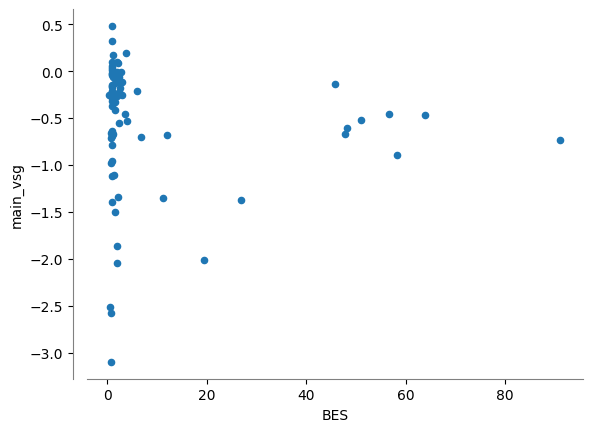

In [14]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots()
merge.plot(x='BES',y='main_vsg',ax=ax,kind='scatter')
clean_axes(ax)
plt.show()

In [15]:
# prepare interactive plots for web server

In [16]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.io as pio

fig = make_subplots(
    rows=1,
    cols=1,
    #subplot_titles=["BES vs Main VSG"],
)

scatter = go.Scatter(
    x=merge['BES'],
    y=merge['main_vsg'],
    mode='markers',
    text=list(merge.index.values),
    hoverinfo='text',
    name='scatter',
    showlegend=False,
    # hovertemplate='%{text}'
)
fig.add_trace(scatter, row=1, col=1)

fig.update_layout(
    width=500,
    height=500,
    showlegend=False,
    hovermode='closest',
    xaxis_title="BES Average Fold Change",
    yaxis_title="Main VSG Log2 Fold Change",
)

# Save as an exportable HTML file
pio.write_html(
    fig,
    file="vsgs_web_server/scatter_plots/bes_vs_main_vsg.html",   # change path/name if you like
    include_plotlyjs="cdn",
    full_html=True,
    auto_open=False,
)
fig

In [17]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.io as pio

fig = make_subplots(
    rows=1,
    cols=1,
    #subplot_titles=["array vs Main VSG"],
)

scatter = go.Scatter(
    x=merge['array'],
    y=merge['main_vsg'],
    mode='markers',
    text=list(merge.index.values),
    hoverinfo='text',
    name='scatter',
    showlegend=False,
    # hovertemplate='%{text}'
)
fig.add_trace(scatter, row=1, col=1)

fig.update_layout(
    width=500,
    height=500,
    showlegend=False,
    hovermode='closest',
    xaxis_title="Array Average Fold Change",
    yaxis_title="Main VSG Log2 Fold Change",
)

# Save as an exportable HTML file
pio.write_html(
    fig,
    file="vsgs_web_server/scatter_plots/array_vs_main_vsg.html",   # change path/name if you like
    include_plotlyjs="cdn",
    full_html=True,
    auto_open=False,
)
fig

In [18]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.io as pio

fig = make_subplots(
    rows=1,
    cols=1,
    #subplot_titles=["MC vs Main VSG"],
)

scatter = go.Scatter(
    x=merge['MC'],
    y=merge['main_vsg'],
    mode='markers',
    text=list(merge.index.values),
    hoverinfo='text',
    name='scatter',
    showlegend=False,
    # hovertemplate='%{text}'
)
fig.add_trace(scatter, row=1, col=1)

fig.update_layout(
    width=500,
    height=500,
    showlegend=False,
    hovermode='closest',
    xaxis_title="MC Average Fold Change",
    yaxis_title="Main VSG Log2 Fold Change",
)

# Save as an exportable HTML file
pio.write_html(
    fig,
    file="vsgs_web_server/scatter_plots/MC_vs_main_vsg.html",   # change path/name if you like
    include_plotlyjs="cdn",
    full_html=True,
    auto_open=False,
)
fig

In [19]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.io as pio

fig = make_subplots(
    rows=1,
    cols=1,
    #subplot_titles=["MES vs Main VSG"],
)

scatter = go.Scatter(
    x=merge['MES'],
    y=merge['main_vsg'],
    mode='markers',
    text=list(merge.index.values),
    hoverinfo='text',
    name='scatter',
    showlegend=False,
    # hovertemplate='%{text}'
)
fig.add_trace(scatter, row=1, col=1)

fig.update_layout(
    width=500,
    height=500,
    showlegend=False,
    hovermode='closest',
    xaxis_title="MES Average Fold Change",
    yaxis_title="Main VSG Log2 Fold Change",
)

# Save as an exportable HTML file
pio.write_html(
    fig,
    file="vsgs_web_server/scatter_plots/MES_vs_main_vsg.html",   # change path/name if you like
    include_plotlyjs="cdn",
    full_html=True,
    auto_open=False,
)
fig

In [20]:

# MC MES array
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.io as pio

fig = make_subplots(
    rows=1,
    cols=1,
    #subplot_titles=["MES vs Main VSG"],
)

scatter = go.Scatter(
    x=merge['BES'],
    y=merge['MES'],
    mode='markers',
    text=list(merge.index.values),
    hoverinfo='text',
    name='scatter',
    showlegend=False,
    # hovertemplate='%{text}'
)
fig.add_trace(scatter, row=1, col=1)

fig.update_layout(
    width=500,
    height=500,
    showlegend=False,
    hovermode='closest',
    xaxis_title="BES Average Fold Change",
    yaxis_title="MES Average Fold Change",
)

# Save as an exportable HTML file
pio.write_html(
    fig,
    file="vsgs_web_server/scatter_plots/BES_vs_MES.html",   # change path/name if you like
    include_plotlyjs="cdn",
    full_html=True,
    auto_open=False,
)
fig

In [21]:
# MC MES array
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.io as pio

fig = make_subplots(
    rows=1,
    cols=1,
    #subplot_titles=["MES vs Main VSG"],
)

scatter = go.Scatter(
    x=merge['BES'],
    y=merge['MC'],
    mode='markers',
    text=list(merge.index.values),
    hoverinfo='text',
    name='scatter',
    showlegend=False,
    # hovertemplate='%{text}'
)
fig.add_trace(scatter, row=1, col=1)

fig.update_layout(
    width=500,
    height=500,
    showlegend=False,
    hovermode='closest',
    xaxis_title="BES Average Fold Change",
    yaxis_title="MC Average Fold Change",
)

# Save as an exportable HTML file
pio.write_html(
    fig,
    file="vsgs_web_server/scatter_plots/BES_vs_MC.html",   # change path/name if you like
    include_plotlyjs="cdn",
    full_html=True,
    auto_open=False,
)
fig

In [22]:
# MC MES array
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.io as pio

fig = make_subplots(
    rows=1,
    cols=1,
    #subplot_titles=["MES vs Main VSG"],
)

scatter = go.Scatter(
    x=merge['BES'],
    y=merge['array'],
    mode='markers',
    text=list(merge.index.values),
    hoverinfo='text',
    name='scatter',
    showlegend=False,
    # hovertemplate='%{text}'
)
fig.add_trace(scatter, row=1, col=1)

fig.update_layout(
    width=500,
    height=500,
    showlegend=False,
    hovermode='closest',
    xaxis_title="BES Average Fold Change",
    yaxis_title="Array Average Fold Change",
)

# Save as an exportable HTML file
pio.write_html(
    fig,
    file="vsgs_web_server/scatter_plots/BES_vs_array.html",   # change path/name if you like
    include_plotlyjs="cdn",
    full_html=True,
    auto_open=False,
)
fig

In [23]:
print('done')

done
